<a href="https://colab.research.google.com/github/willclopes/Portfolio-Data-Science/blob/master/17_ML_Prevendo_se_um_usuario_do_Spotify_salvara_uma_musica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo se um usuário do Spotify salvará uma música (Classificação)
---
By Willian C Lopes




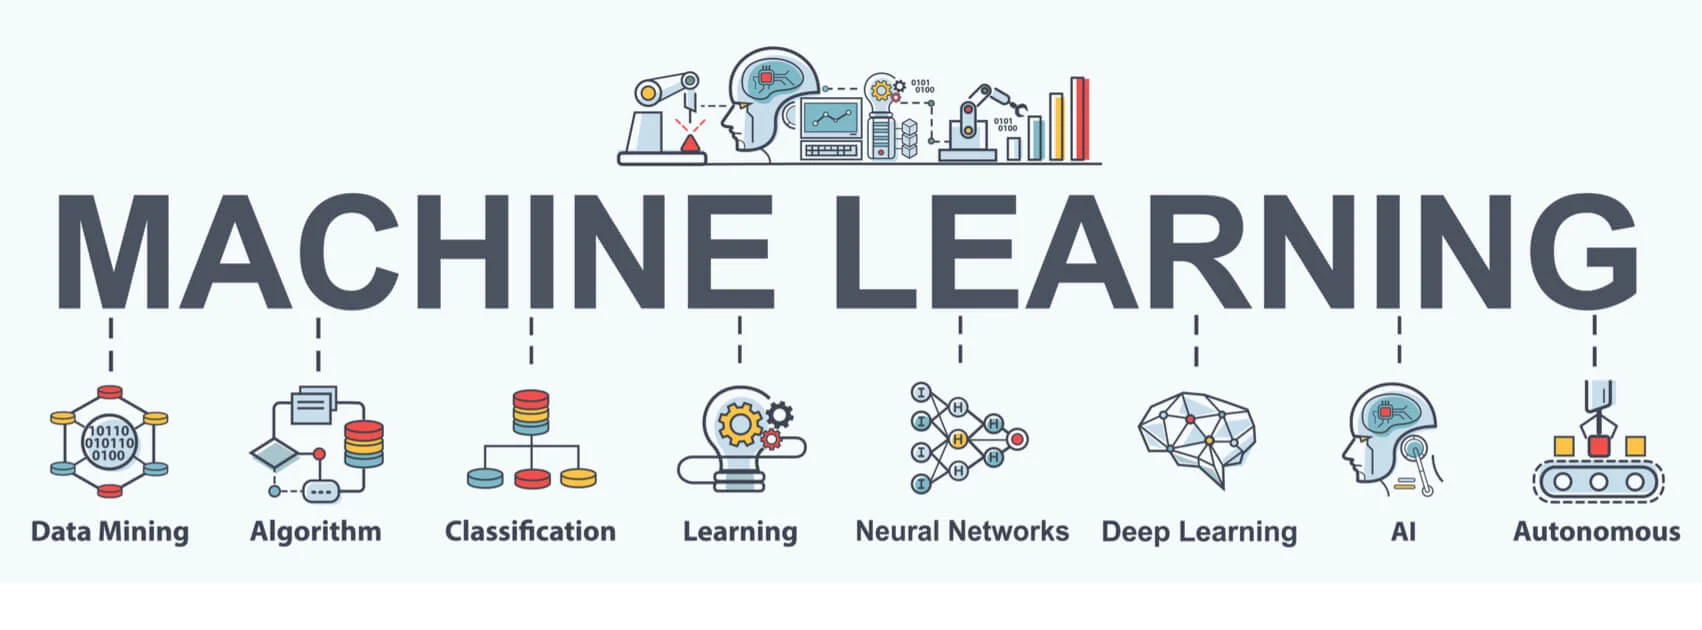

# **Introdução**

O aprendizado de máquina (ML) é o estudo de algoritmos de computador, que melhoram com a experiência e o uso de dados. Os algoritmos de aprendizado de máquina criam um modelo com base em dados de amostra (dados de treinamento) e fazem previsões ou decisões usando esse modelo sem serem programados para isso.

Os algoritmos de aprendizado de máquina têm uma ampla variedade de aplicações, como detecção de fraudes, filtragem de e-mail, etc. 

Pode-se pensar nos algoritmos de aprendizado de máquina como caindo em uma das três categorias principais - aprendizado supervisionado, aprendizado não supervisionado e a aprendizagem por reforço . A diferença é simples, mas muito importante.

- **Aprendizagem Supervisionada:** fazem uso de um conjunto de treinamento de dados de entrada e saída. O algoritmo aprende uma relação entre os dados de entrada e saída do conjunto de treinamento e, em seguida, usa essa relação para prever a saída de novos dados. Um dos objetivos de aprendizagem supervisionada mais comuns é a classificação. O aprendizado de classificação visa usar as informações aprendidas para prever a associação de uma determinada classe. O exemplo de pontuação de crédito representa o aprendizado de classificação, pois prevê pessoas inadimplentes.

- **A aprendizagem não supervisionad** visa fazer observações em dados onde não há resultado ou resultado conhecido, por meio da dedução de padrões e estruturas subjacentes nos dados. A aprendizagem por associação é uma das formas mais comuns de aprendizagem não supervisionada, em que o algoritmo procura associações entre os dados de entrada. O exemplo de análise da cesta de compras representa o aprendizado de associação.

- **A aprendizagem por reforço** é uma forma de aprendizagem por 'tentativa e erro' em que os dados de entrada estimulam o algoritmo a uma resposta e onde o algoritmo é 'punido' ou 'recompensado' dependendo se a resposta foi a desejada. A robótica e a tecnologia autônoma fazem grande uso dessa forma de aprendizado,

## **Contexto:**

O Spotify é a plataforma de streaming de música número um do mundo. A maioria de nós ouve música diariamente nessa plataforma. No entanto, a quantidade de seleção de músicas pode ser esmagadora na época. O objetivo deste projeto é 'prever'  se um ouvinte salvará uma música em sua lista de reprodução curtida.





### **- O que faremos?**

Empregaremos técnicas de pré-processamento como IQR, Z-score e normalization para preparar os dados e treinar a técnica de teste de validação para treinar e avaliar o modelo. Posteriormente, aplicaremos diferentes modelos estatísticos como Logistic Regression, Decision Tree, Random Forest para resolver esse classification problema.


Índice
1. EDA
2. Pré-processamento de dados
3. Técnica de treinamento, validação e teste
4. Treine o modelo
5. Melhore o modelo
6. Conclusão



### **- Descrição dos dados**

- Acústica : Uma medida de confiança de 0,0 a 1,0 se a faixa é acústica.

- Dançabilidade : Uma medida de Dançabilidade de 0,0 a 1,0 descreve o quão adequada uma faixa é para dançar.

- Duration_ms : A duração da trilha em milissegundos.

- Energia : A energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade.

- Instrumentalidade : Prevê se uma faixa não contém vocais. Quanto mais próximo o valor instrumental estiver de 1,0

- Key : O tom em que a faixa está. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0=C,1=C# etc.

- Liveness : Detecta a presença de uma audiência na gravação. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

- Loudness : O volume geral de uma faixa em decibéis (dB)

- Mode : Indica a modalidade (maior ou menor) da música.

- Falas : A capacidade de fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação, mais próximo de 1,0 o valor do atributo.

- Tempo : O tempo geral estimado de uma faixa em batidas por minuto (BPM)

- Time_signature : Uma assinatura de tempo geral estimada de uma faixa.

- Valência : Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa.

- Song_title: O nome da música.

- Artista: O cantor da música.

- Target : O valor codificado de 0 ou 1 descreve se o ouvinte salvará a música ou não.




### **- Baixando os dados**

O conjunto de dados que será usado aqui fora obtido do Kaggle. O conjunto de dados fornecido será analisado com base em todas as informações baixadas.

Tem-se algumas opções para baixar a base de dados, entre elas estão:

- No [Kaggle](https://www.kaggle.com/geomack/spotifyclassification)

- No meu [Github](https://raw.githubusercontent.com/willclopes/Portfolio-Datasets/main/spotify_classification_like-a-song.csv)




---



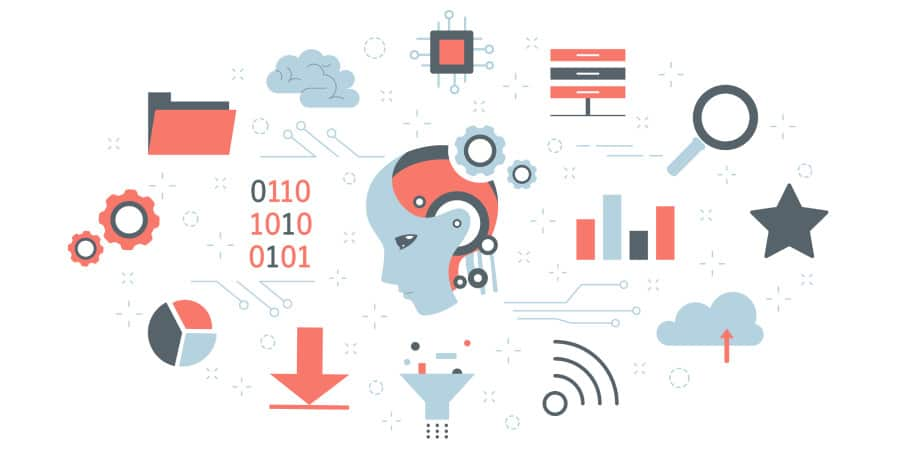

## EDA

A EDA é uma etapa crítica para analisar o conjunto de dados. Através de um EDA iremos:
* Detectar alguns erros
* Confira algumas premissas
* Selecione os modelos apropriados
* Determinar uma relação entre as variáveis ​​de entrada e saída

Começaremos importando as bibliotecas necessárias.

In [ ]:
import pandas as pd 
import numpy as np
 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

 
from sklearn.linear_model import LogisticRegression 

In [ ]:
spotify_df=pd.read_csv("https://raw.githubusercontent.com/willclopes/Portfolio-Datasets/main/spotify_classification_like-a-song.csv")

In [ ]:
spotify_df.shape

(2017, 17)

In [ ]:
spotify_df.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [ ]:
spotify_df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [ ]:
spotify_df.drop("Unnamed: 0", axis=1, inplace=True)  

## Exploração Inicial do Conjunto de Dados 

### 1. Forma (dimensões) do DataFrame

Um DataFrame tem linhas e colunas, e o atributo **.shape** do Pandas retorna uma tupla de comprimento 2, cada valor mostrando o comprimento de cada dimensão ou (linhas, colunas). 

Podemos ver que o conjunto de dados possui 2017 linhas e 17 colunas. 

### 2. Tipos de dados das várias colunas

Logo após, exibimos todos os tipos de dados das colunas. Isso nos ajuda a entender o tipo de dados com os quais estamos lidando, em termos de distribuições numéricas e categóricas. Isso também lançará luz sobre alguns dos gráficos e plotagens exploratórias a serem usados.

### 3. Valores Nulos e Faltantes

Não existem valores nulos as colunas desde dataset.




### Interferências

In [ ]:
spotify_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


* A média de Acousticness, Speechiness e Q2 (50% percentil) não coincide. 

* Temos um grande salto entre o mínimo e o Q1, o Q3 e o máximo. Podemos ter alguns outliers.

* Na coluna dançabilidade e energia, temos uma disparidade entre o min e o Q1. Também podemos ter alguns outliers.

* A assinatura de tempo tem o mesmo valor para Q1, Q2, Q3.

* Os instrumentais têm um desvio padrão maior que sua média, o que significa que a maioria dos pontos de dados não está agrupada em torno da média. Também tem o valor 0 para o min e Q2.

Vamos verificar essas suposições olhando para o histograma das variáveis.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(12,7)
# matplotlib.rcParams['figure.facecolor']='#00000000'

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
dist_cols=spotify_df.select_dtypes(include=['int64','float64']).columns.tolist()

j=1
d=1

part1=spotify_df[dist_cols].columns[0:7]
part2=spotify_df[dist_cols].columns[7:14]


fig= make_subplots(rows=2, cols=7, start_cell ='top-left', subplot_titles=('acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness','loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'target'))


for k in part2:
    for i in part1:
        if j<8:
            fig.add_trace(go.Histogram(x=spotify_df[i]),row=1,col=j)
            j+=1
    if d<8:
        fig.add_trace(go.Histogram(x=spotify_df[k]),row=2,col=d)
        d+=1
fig.update_layout(bargap=.2,width=1100,height=500)
fig.show()


Nossas inferências olhando para os dados estatísticos estavam corretas em sua maioria. Temos um monte de discrepâncias na acústica, duração, energia, instrumentalidade, vivacidade, volume e fala. A maioria das variáveis ​​de entrada tem uma distribuição não gaussiana


**Vamos tentar remover alguns desses outliers.**

Um **outlier** é um evento raro e improvável que não se encaixa de alguma forma.

O método de **intervalo interquartil** , também conhecido como IQR , é um método estatístico útil para lidar com distribuição não gaussiana. O IQR é calculado como a diferença entre o percentil 75 e 25. O IQR pode ser usado para identificar valores discrepantes definindo limites nas amostras. O fator k do IQR está abaixo do percentil 25 ou acima do percentil 75.

O **Z-score** é outro método útil para lidar com outliers com uma distribuição gaussiana. O Zscore é calculado com o desvio padrão e removendo todos os pontos de dados que estão fora de três desvios padrão. Esses pontos de dados ainda fazem parte disso, é um evento improvável e raro.

In [ ]:
from numpy import percentile

In [ ]:
def remove_outliers(df,name='feature'):
    #Armazena o percentil 25 e 75
    q25,q75=percentile(df[name],25),percentile(df[name],75)
    #Calcula o intervalo interquartil
    iqr_cut=1.5*(q75-q25)
    #Cria variável de corte inferior e superior
    lower,upper=q25-iqr_cut,q75+iqr_cut
    #Remove os outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

In [ ]:
def remove_outliers_gaussian(df,name='feature'):
    #calcula a média e o desvio padrão
    mean,std=np.mean(df[name]),np.std(df[name])
    #cria a variável de corte
    std_cut= 3*std
    #cria variável de corte inferior e superior
    lower,upper=mean-std_cut,mean+std_cut
    #Remove os outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

In [ ]:
spotify_df1=spotify_df.copy()
spotify_df1=remove_outliers(spotify_df1,'acousticness')
len(spotify_df1)

1823

Depois de remover alguns outliers usando o método IQR nas colunas Acousticness, ficamos com 1823 linhas. 

Pode surgir a dúvida: por que não usar o IQR ou o Zscore em todos os conjuntos de dados?

A razão é que, se o usarmos em todos os conjuntos de dados, ficaremos com metade do nosso conjunto de dados. Perderemos informações valiosas que podemos precisar mais tarde para criar nosso modelo.

Vamos olhar novamente para a distribuição.

In [ ]:
j=1
d=1

part1=spotify_df1[dist_cols].columns[0:7]
part2=spotify_df1[dist_cols].columns[7:14]


fig= make_subplots(rows=2, cols=7, start_cell ='top-left', subplot_titles=('acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness','loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'target'))


for k in part2:
    for i in part1:
        if j<8:
            fig.add_trace(go.Histogram(x=spotify_df[i]),row=1,col=j)
            j+=1
    if d<8:
        fig.add_trace(go.Histogram(x=spotify_df[k]),row=2,col=d)
        d+=1
fig.update_layout(bargap=.2,width=1100,height=500)
fig.show()

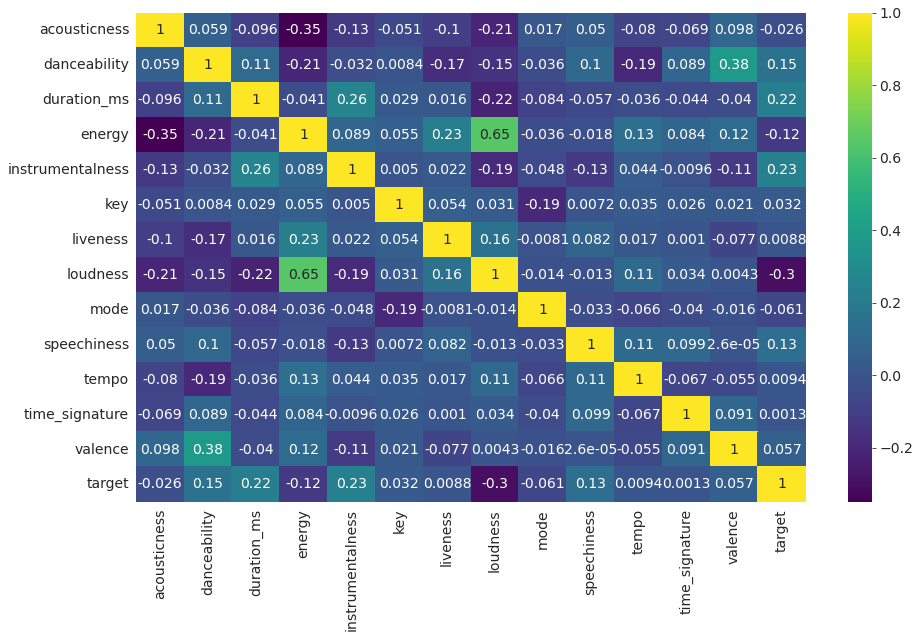

In [ ]:
df_corr=spotify_df1.corr()
plt.figure(figsize=(15,9))
sns.heatmap(df_corr,annot=True,cmap='viridis');

### Inferências:

Amarelo significa correlação alta, verde significa correlação média e roxo significa correlação negativa.

Nossa matriz de correlação nos mostra quase nenhuma correlação com o alvo. A correlação mais alta com o alvo é baixa. A instrumentalidade é de cerca de 0,23.

O conjunto de dados pode não ser adequado para usar a regressão logística.

Vamos plotar as variáveis ​​de entrada que se correlacionam com os preços.


In [ ]:
fig= make_subplots(rows=1, cols=3, start_cell ='top-left', subplot_titles=('danceability vs target', 'duration_ms vs target',
       'instrumentalness vs target'))


fig.add_trace(go.Scatter(x=spotify_df['danceability'][spotify_df['target']==0],mode='markers',marker_size=5,name='discard'),row=1,col=1)
fig.add_trace(go.Scatter(x=spotify_df['danceability'][spotify_df['target']==1],mode='markers',marker_size=5,name='save'),row=1,col=1)
fig.add_trace(go.Scatter(x=spotify_df['duration_ms'][spotify_df['target']==0],mode='markers',marker_size=5,name='discard'),row=1,col=2)
fig.add_trace(go.Scatter(x=spotify_df['duration_ms'][spotify_df['target']==1],mode='markers',marker_size=5,name='save'),row=1,col=2)
fig.add_trace(go.Scatter(x=spotify_df['instrumentalness'][spotify_df['target']==0],mode='markers',marker_size=5,name='discard'),row=1,col=3)
fig.add_trace(go.Scatter(x=spotify_df['instrumentalness'][spotify_df['target']==1],mode='markers',marker_size=5,name='save'),row=1,col=3)
       
fig.update_layout(width=1100,height=500)
fig.show()

* A música que o ouvinte salva fica entre 1min30s e 3min40s. No entanto, há mais músicas que ele não gosta nesse intervalo. Se uma música estiver em um intervalo de 4 a 8 minutos, ele terá mais chances de salvar.

* se a dançabilidade estiver na faixa de 0,5 a 0,9, o ouvinte salvará a música. Parece que há mais músicas que ele não gosta quando a dançabilidade chega a 0,8

* Na maioria das músicas que ele gosta e não gosta, a instrumentalidade fica entre 0 e 0,2. Porém, existe uma tendência, ele salva mais músicas do que descarta quando a Instrumentalidade está entre 0,2 a 1.



In [ ]:
spotify_df.artist.nunique()
spotify_df.artist[spotify_df.target == 1].nunique()

653

O ouvinte gosta de 43% do artista que ouve.

In [ ]:
like=spotify_df[spotify_df.target == 1]
like.groupby('artist').sum()['target'].sort_values(ascending=False).head(20)

artist
Drake                     13
Disclosure                12
Crystal Castles            9
FIDLAR                     9
Kanye West                 8
CHVRCHES                   7
Young Thug                 7
Beach House                6
Hot Chip                   6
Future                     6
M83                        6
ASTR                       6
Grimes                     6
Purity Ring                5
A$AP Ferg                  5
Teams vs. Star Slinger     5
ILoveMakonnen              5
Tame Impala                5
Duke Dumont                5
The Partysquad             5
Name: target, dtype: int64

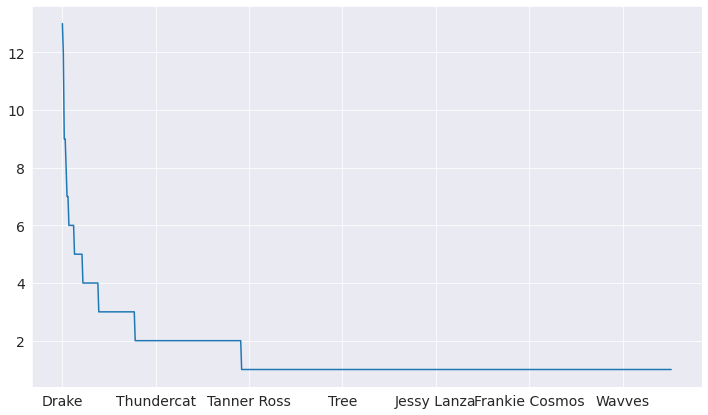

In [ ]:
like.artist.value_counts().plot();

Podemos inferir pela lista de artistas que ele mais salvou que ele gosta de rap, música eletrônica e rock alternativo.

Criaremos conjuntos de treinamento, validação e teste.

Os modelos são treinados nos dados. Os hiperparâmetros serão selecionados com base no conjunto de validação e a medição final será feita no conjunto de teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df,test_df=train_test_split(spotify_df1,test_size=0.2,random_state=2)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=2)

In [ ]:
print('Train_df.shape:',train_df.shape)
print('Val_df.shape:',val_df.shape)
print('Test_df.shape',test_df.shape)

Train_df.shape: (1093, 16)
Val_df.shape: (365, 16)
Test_df.shape (365, 16)


## Identificação das entradas e do destino

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [ ]:
df_sem_target = spotify_df.drop("target", 1)

In [ ]:
inputs_cols=df_sem_target.columns
target_col='target'

In [ ]:
print('inputs: {}'.format(inputs_cols))
print('target: {}'.format(target_col))

inputs: Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'song_title',
       'artist'],
      dtype='object')
target: target


In [ ]:
#Cria entradas de train e destino
train_inputs=train_df[inputs_cols].copy()
train_target=train_df[target_col].copy()

#Criar entradas e destino val
val_inputs=val_df[inputs_cols].copy()
val_target=val_df[target_col].copy()

#Criar entradas de teste e destino
test_inputs=test_df[inputs_cols].copy()
test_target=test_df[target_col].copy()

In [ ]:
train_inputs

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
491,0.013200,0.677,271480,0.860,0.011900,1,0.0487,-5.074,1,0.0348,121.989,4.0,0.7930,Don't Deny Your Heart,Hot Chip
698,0.005250,0.700,307467,0.675,0.000000,2,0.6570,-6.362,1,0.1490,124.882,4.0,0.2270,No New Friends - SFTB Remix,DJ Khaled
540,0.104000,0.241,194600,0.588,0.000420,7,0.0870,-6.914,1,0.0313,171.882,4.0,0.5060,Pictures Of Matchstick Men,Status Quo
1849,0.371000,0.814,268040,0.431,0.000000,8,0.3350,-9.125,1,0.0936,129.957,4.0,0.5460,My Little Secret,Xscape
2005,0.021600,0.526,216072,0.825,0.000001,5,0.4260,-3.506,0,0.0875,150.181,4.0,0.1080,Spoon Me - Slushii Remix,Elliphant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,0.302000,0.696,292987,0.521,0.000000,10,0.0565,-8.465,0,0.3320,100.000,4.0,0.4710,No Role Modelz,J. Cole
942,0.000017,0.499,395200,0.506,0.941000,9,0.0784,-16.778,0,0.1490,186.328,3.0,0.3670,Remember,Gino Soccio
1326,0.001250,0.217,255725,0.980,0.001390,5,0.2870,-3.332,1,0.1330,139.024,4.0,0.0658,Plagues,The End At The Beginning
1956,0.441000,0.762,193160,0.705,0.000000,4,0.1180,-5.082,1,0.0991,119.439,4.0,0.7760,Shaddap You Face,Joe Dolce


## Identificação das colunas numéricas e categóricas

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [ ]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 491 to 267
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1093 non-null   float64
 1   danceability      1093 non-null   float64
 2   duration_ms       1093 non-null   int64  
 3   energy            1093 non-null   float64
 4   instrumentalness  1093 non-null   float64
 5   key               1093 non-null   int64  
 6   liveness          1093 non-null   float64
 7   loudness          1093 non-null   float64
 8   mode              1093 non-null   int64  
 9   speechiness       1093 non-null   float64
 10  tempo             1093 non-null   float64
 11  time_signature    1093 non-null   float64
 12  valence           1093 non-null   float64
 13  song_title        1093 non-null   object 
 14  artist            1093 non-null   object 
dtypes: float64(10), int64(3), object(2)
memory usage: 136.6+ KB


In [ ]:
numerical_cols=train_inputs.select_dtypes(include=['float64','int64']).columns.tolist()
encoded_cols=['mode']
categorical_cols=train_inputs.select_dtypes(include=['object']).columns.tolist()

In [ ]:
categorical_cols

['song_title', 'artist']

In [ ]:
train_inputs[numerical_cols].describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,0.118758,0.630171,241087.675206,0.716446,0.102856,5.438243,0.195080,-6.418242,0.608417,0.095066,121.689742,3.986276,0.516843
std,0.154064,0.154949,71212.357197,0.168370,0.242131,3.659635,0.162326,2.705178,0.488328,0.092823,25.802387,0.224004,0.235189
min,0.000003,0.123000,52006.000000,0.118000,0.000000,0.000000,0.018800,-22.751000,0.000000,0.023100,64.992000,3.000000,0.035900
25%,0.007670,0.537000,200080.000000,0.593000,0.000000,2.000000,0.089800,-7.697000,0.000000,0.038400,100.338000,4.000000,0.325000
50%,0.045300,0.640000,226840.000000,0.737000,0.000029,6.000000,0.128000,-6.012000,1.000000,0.056300,121.999000,4.000000,0.516000
75%,0.172000,0.745000,263213.000000,0.857000,0.019700,9.000000,0.250000,-4.598000,1.000000,0.112000,135.965000,4.000000,0.704000
max,0.643000,0.950000,825027.000000,0.998000,0.976000,11.000000,0.969000,-0.935000,1.000000,0.816000,219.331000,5.000000,0.992000


## Pré-processamento de dados

### Dimensionamento de Feature

O dimensionamento de dados é importante porque os modelos de aprendizado de máquina aprendem com o mapeamento das entradas para as saídas. **Se as entradas tiverem intervalos e escalas diferentes, o modelo terá dificuldade durante o aprendizado e não terá um bom desempenho em um cenário de caso real.** 

No nosso caso, Acousticness tem um intervalo de 0 a 0,99, uma tecla tem um intervalo de 1 a 11 e um andamento de 47,85 a 219,33. O intervalo do conjunto de dados varia de acordo com os recursos.

Para resolver esse problema, **usaremos a normalização.**

A normalização está redimensionando o intervalo de dados originais para que fique entre 0 e 1.

**y= x-min/max-min**

E por que não usar a padronização. A padronização assume que temos distribuição gaussiana significando distribuição normal. A maioria das características do nosso conjunto de dados tem distribuição não gaussiana como podemos ver. Ainda poderíamos padronizar, mas talvez não tenhamos um resultado desejável.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
train_inputs[numerical_cols]=scaler.fit_transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=scaler.fit_transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=scaler.fit_transform(test_inputs[numerical_cols])

In [ ]:
test_inputs[numerical_cols].describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.185078,0.595163,0.276697,0.679960,0.136602,0.470486,0.205015,0.682261,0.580822,0.151703,0.399794,0.493151,0.500981
std,0.234606,0.182219,0.104177,0.193458,0.278388,0.332413,0.181853,0.147151,0.494102,0.190196,0.202083,0.086648,0.252752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011080,0.478107,0.219370,0.581451,0.000000,0.090909,0.084055,0.607654,0.000000,0.029905,0.240422,0.500000,0.305123
50%,0.087019,0.617751,0.253859,0.699168,0.000080,0.545455,0.125580,0.703296,1.000000,0.072289,0.396913,0.500000,0.499517
75%,0.289053,0.714793,0.306267,0.824019,0.045026,0.727273,0.289926,0.783408,1.000000,0.171687,0.524177,0.500000,0.682096
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Codificação de rótulo

O Label encoding converte cada valor de uma coluna em um número. O novo valor está entre 0 e n_categories-1. E por que não codificar as colunas categóricas?


O problema com a codificação one-hot é a dimensionalidade do conjunto de dados. Temos 1826 músicas únicas e cerca de 1000 artistas únicos. Se codificarmos cada um desses valores, nosso conjunto de dados terá muitos parâmetros e o modelo será muito complexo para aprender os dados.

Assim, rotularemos as colunas categóricas (artista e título da música) de nosso conjunto de dados, atribuindo-lhes um número.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
train_inputs['song_title']=encoder.fit_transform(train_inputs['song_title'])
val_inputs['song_title']=encoder.fit_transform(val_inputs['song_title'])
test_inputs['song_title']=encoder.fit_transform(test_inputs['song_title'])

train_inputs['artist']=encoder.fit_transform(train_inputs['artist'])
val_inputs['artist']=encoder.fit_transform(val_inputs['artist'])
test_inputs['artist']=encoder.fit_transform(test_inputs['artist'])

In [ ]:
encoded_cols=['mode','song_title','artist']

In [ ]:
train_inputs[categorical_cols]

,song_title,artist
491,226,330
698,633,188
540,692,652
1849,612,784
2005,839,245
...,...,...
1409,636,351
942,738,298
1326,695,689
1956,786,373


In [ ]:
X_train=train_inputs[numerical_cols + encoded_cols]
X_val= val_inputs[numerical_cols + encoded_cols]
X_test=test_inputs[numerical_cols + encoded_cols]

In [ ]:
X_val

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mode,song_title,artist
1810,0.325612,0.564634,0.305430,0.525547,0.000003,0.000000,0.100275,0.412992,1.0,0.034509,0.240965,0.5,0.499035,1.0,355,70
1874,0.051072,0.626829,0.212072,0.691971,0.000016,0.636364,0.126603,0.735246,0.0,0.114710,0.298065,0.5,0.699635,0.0,149,191
849,0.040578,0.701220,0.330357,0.830657,0.420455,0.545455,0.027816,0.687208,0.0,0.106998,0.475039,0.5,0.879854,0.0,193,108
1251,0.016504,0.554878,0.256459,0.618978,0.000000,0.727273,0.174679,0.712016,1.0,0.033160,0.284247,0.5,0.506544,1.0,43,56
1669,0.055393,0.728049,0.253001,0.481752,0.000000,0.454545,0.081387,0.559047,0.0,0.058994,0.742831,0.5,0.963527,0.0,356,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,0.293204,0.746341,0.294735,0.289051,0.000000,0.818182,0.110577,0.669740,0.0,0.033160,0.269777,0.5,0.509762,0.0,268,138
983,0.212956,0.613415,0.316500,0.509489,0.007076,0.545455,0.662317,0.550980,1.0,0.100829,0.226287,0.5,0.348852,1.0,316,163
533,0.012553,0.289024,0.000000,0.967883,0.907025,0.000000,0.410485,0.882999,1.0,0.125892,0.662249,0.5,0.397125,1.0,215,89
888,0.737652,0.823171,0.176892,0.402920,0.002903,0.181818,0.023008,0.549281,1.0,0.250048,0.210821,0.5,0.921691,1.0,24,300


## Treine o modelo

### Regressão Logística

Começaremos a treinar nosso modelo usando Regressão Logística.

A regressão logística é um modelo de aprendizado supervisionado cuja saída é binary. Ela usa a soma ponderada das variáveis ​​de entrada na função sigmoid e produz uma variável binária 0 ou 1.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
logistic_reg=LogisticRegression(solver='liblinear').fit(X_train,train_target)

In [ ]:
train_preds=logistic_reg.predict(X_train)

In [ ]:
accuracy_score(train_target,train_preds)

0.7081427264409881

In [ ]:
val_preds=logistic_reg.predict(X_val)
accuracy_score(val_target,val_preds)

0.6958904109589041

Como percebemos anteriormente com a matriz de correlação, os recursos têm uma correlação fraca com o alvo. Portanto, logistic regression pode não ser o modelo ideal para o problema.

Tentaremos usar outro modelo de aprendizado de máquina chamado Árvore de Decisão.


In [ ]:
def predict_plot(inputs,target,name=''):
    preds=model.predict(inputs)
    acc=accuracy_score(target,preds)
    cf=confusion_matrix(target,preds)
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel('Predição')
    plt.ylabel('target')
    plt.title(name)
    print('Acuracia: {:.2f}'.format(acc*100))

### Árvore de decisão

A Árvore de Decisão é um modelo de aprendizado supervisionado no qual os dados são continuamente divididos com base em um determinado parâmetro. A árvore pode ser definida com dois parâmetros principais:

* Nós de decisão: onde a decisão é dividida
* Folhas: os resultados

Desta vez, tentaremos remover o outlier usando o Zscore na coluna de dança e pular a parte de pré-processamento. A árvore de decisão não faz com que os dados sejam pré-processados ​​para serem eficazes.

In [ ]:
#Armazena uma cópia do conjunto de dados
spotify_df1=spotify_df.copy()
# remove outlier usando Zcore
spotify_df1=remove_outliers_gaussian(spotify_df1,'danceability')
print('Size of dataset: ',len(spotify_df1))

# Cria um conjunto de trem, val e teste
train_val_df,test_df=train_test_split(spotify_df1,test_size=0.2,random_state=2)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=2)

#Identifica as variáveis ​​de entrada
df_sem_target = spotify_df1.drop("target", 1)
inputs_cols=df_sem_target.columns
target_col='target'

#Identifica as colunas numéricas, categóricas e codificadas
numerical_cols=train_inputs.select_dtypes(include=['float64','int64']).columns.tolist()
encoded_cols=['mode']
categorical_cols=train_inputs.select_dtypes(include=['object']).columns.tolist()

#Cria entradas de train e target
train_inputs=train_df[inputs_cols].copy()
train_target=train_df[target_col].copy()

#Cria entradas e destino val
val_inputs=val_df[inputs_cols].copy()
val_target=val_df[target_col].copy()

#Criar entradas de teste e destino
test_inputs=test_df[inputs_cols].copy()
test_target=test_df[target_col].copy()

train_inputs['song_title']=encoder.fit_transform(train_inputs['song_title'])
val_inputs['song_title']=encoder.fit_transform(val_inputs['song_title'])
test_inputs['song_title']=encoder.fit_transform(test_inputs['song_title'])

train_inputs['artist']=encoder.fit_transform(train_inputs['artist'])
val_inputs['artist']=encoder.fit_transform(val_inputs['artist'])
test_inputs['artist']=encoder.fit_transform(test_inputs['artist'])

#Cria as variáveis ​​X_train,X_val e X_test
X_train=train_inputs[numerical_cols + encoded_cols]
X_val= val_inputs[numerical_cols + encoded_cols]
X_test=test_inputs[numerical_cols + encoded_cols]

Size of dataset:  2015


In [ ]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist,mode
703,0.001520,0.626,299383,0.888,0.055100,9,0.2430,-4.981,0,0.0461,126.976,4.0,0.728,316,694,0
1986,0.001730,0.472,321280,0.844,0.000000,10,0.2400,-6.578,1,0.0540,140.034,4.0,0.343,62,877,1
850,0.000173,0.641,262000,0.954,0.425000,5,0.0535,-6.765,0,0.0589,122.790,4.0,0.827,932,154,0
1458,0.265000,0.677,185613,0.778,0.000000,6,0.2470,-5.190,0,0.0291,97.970,4.0,0.335,1089,482,0
1425,0.027300,0.501,269720,0.775,0.000000,7,0.2110,-6.248,0,0.4360,85.929,4.0,0.615,772,666,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0.031600,0.680,211853,0.725,0.000018,6,0.1120,-3.920,1,0.0611,140.048,4.0,0.260,306,29,1
1610,0.059000,0.624,187838,0.732,0.014200,4,0.2540,-6.372,0,0.0273,132.025,4.0,0.292,41,23,0
784,0.713000,0.628,303560,0.575,0.002330,10,0.0635,-11.591,0,0.0588,108.166,4.0,0.182,823,455,0
343,0.068600,0.388,220467,0.598,0.000000,4,0.6570,-9.485,0,0.0296,154.780,4.0,0.641,447,893,0


In [ ]:
spotify_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2015 non-null   float64
 1   danceability      2015 non-null   float64
 2   duration_ms       2015 non-null   int64  
 3   energy            2015 non-null   float64
 4   instrumentalness  2015 non-null   float64
 5   key               2015 non-null   int64  
 6   liveness          2015 non-null   float64
 7   loudness          2015 non-null   float64
 8   mode              2015 non-null   int64  
 9   speechiness       2015 non-null   float64
 10  tempo             2015 non-null   float64
 11  time_signature    2015 non-null   float64
 12  valence           2015 non-null   float64
 13  target            2015 non-null   int64  
 14  song_title        2015 non-null   object 
 15  artist            2015 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

Train Accuracy:100.00%
Validation Accuracy:69.73%


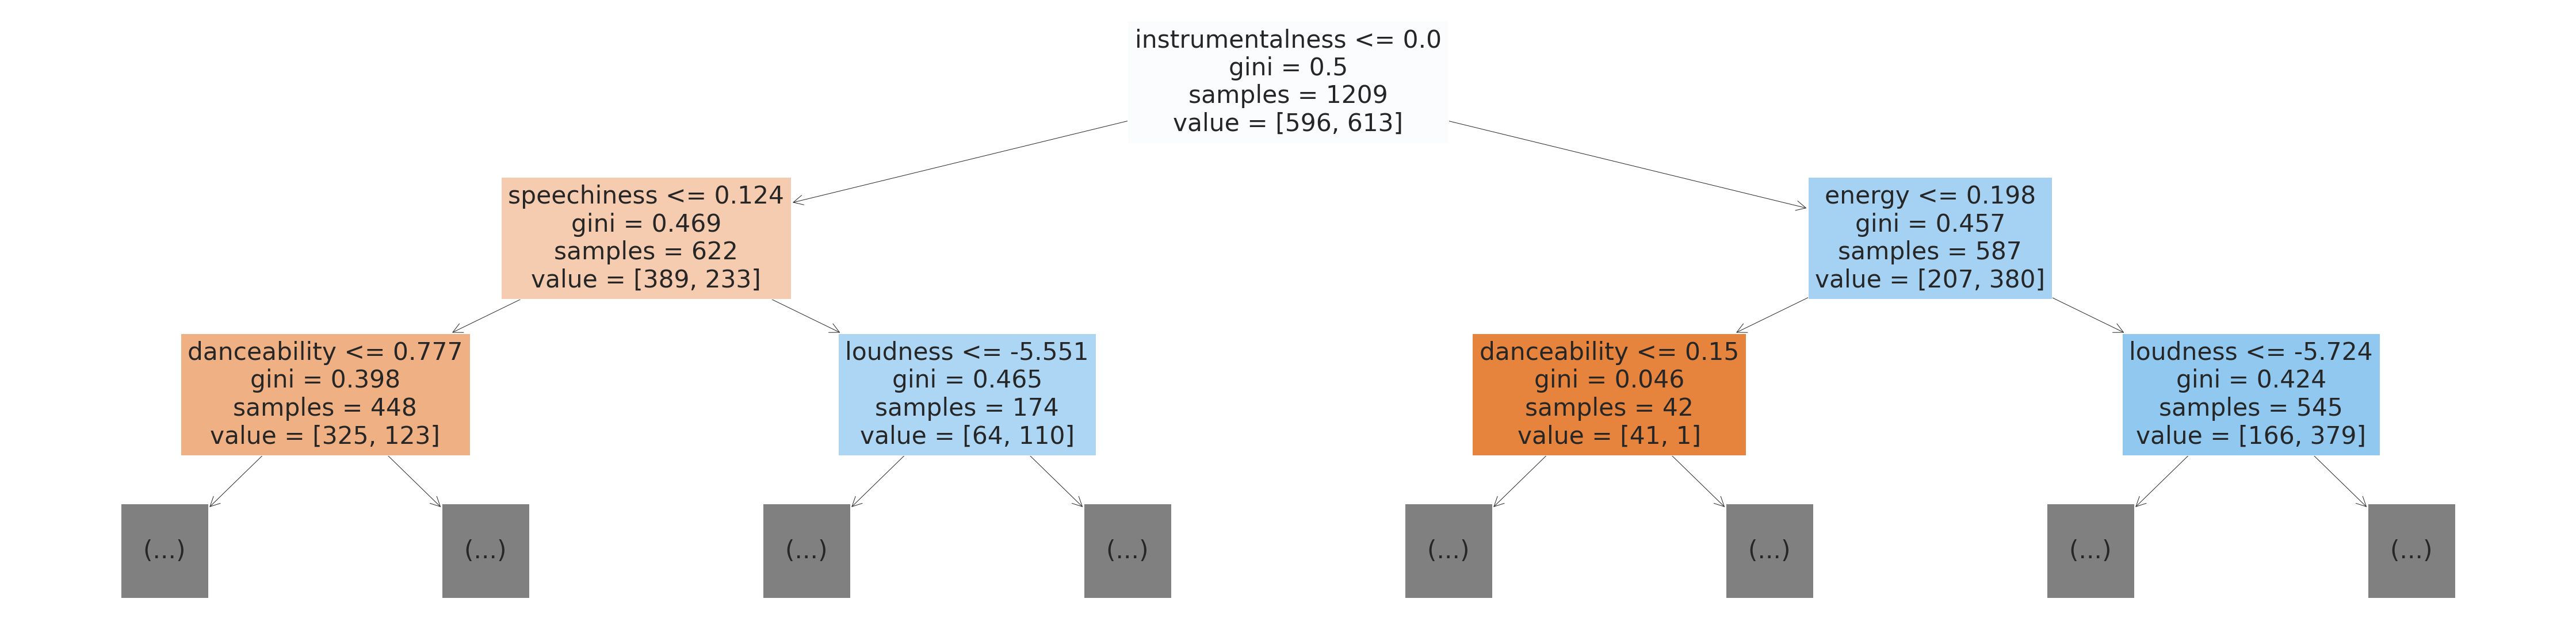

In [ ]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Train the model
model = DecisionTreeClassifier(random_state=2).fit(X_train,train_target)

#Make prediction
train_preds=model.predict(X_train)

#Evaluate the train_inputs
train_acc=accuracy_score(train_target,train_preds)
print('Train Accuracy:{:.2f}%'.format(train_acc*100))
#Evaluate the val_inputs
val_preds=model.predict(X_val)
val_acc=accuracy_score(val_target,val_preds)
print('Validation Accuracy:{:.2f}%'.format(val_acc*100))

#Plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=2,filled=True);

A precisão da validação é um pouco melhor do que a regressão logística. No entanto, nosso modelo supera os dados. O overfitting ocorre quando o modelo aprendeu o ruído dos dados no conjunto de treinamento e não generaliza bem no conjunto de validação.

Vejamos a feature importance

In [ ]:
model.feature_importances_

array([0.06951974, 0.08401785, 0.085341  , 0.10962416, 0.11964921,
       0.04251197, 0.04003641, 0.09210747, 0.01083337, 0.09722933,
       0.04712662, 0.        , 0.07328456, 0.05309844, 0.07561988,
       0.        ])

In [ ]:
importance_df= pd.DataFrame({
    'feature':X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance',ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
4,instrumentalness,0.119649
3,energy,0.109624
9,speechiness,0.097229
7,loudness,0.092107
2,duration_ms,0.085341
1,danceability,0.084018
14,artist,0.075620
12,valence,0.073285
0,acousticness,0.069520
13,song_title,0.053098


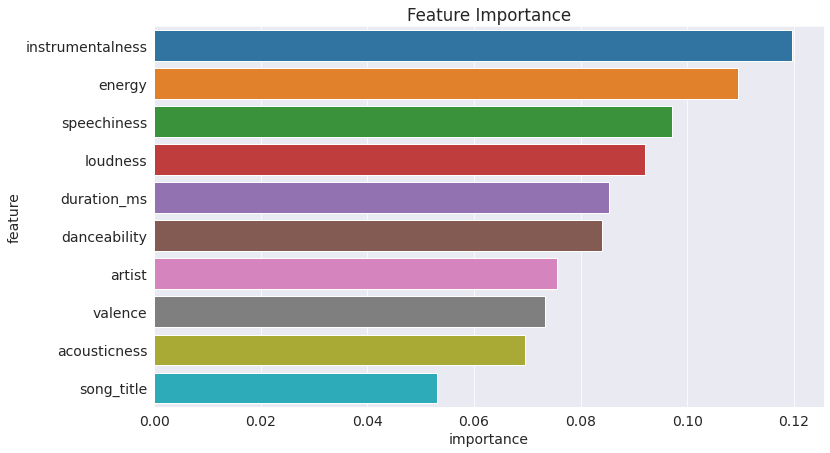

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance',y='feature');

No modelo, as características mais importantes são Instrumentalidade, Energia, Loudness e Speechiness. Tentaremos melhorar o modelo ajustando os hiperparâmetros.

### Melhore o modelo

Vamos ajustar o parâmetro max_depth.

A profundidade máxima é um hiperparâmetro que controla o número de exemplos de treinamento que o modelo usará. Anteriormente, tínhamos 100% de precisão no conjunto de treinamento porque o modelo aprendeu todos os exemplos de treinamento.
Consequentemente, teve dificuldade em generalizar no conjunto de validação. Assim, ajustar o parâmetro max_depth pode reduzir o overfitting.

In [ ]:
model=DecisionTreeClassifier(max_depth=7, random_state=2)
model.fit(X_train, train_target)
model.score(X_train,train_target)

0.8527708850289496

In [ ]:
model.score(X_val,val_target)

0.7444168734491315

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=2)
    model.fit(X_train, train_target)
    train_acc = 1 - model.score(X_train, train_target)
    val_acc= 1 - model.score(X_val, val_target)
    
    return {'Max Depth': md, 'Erro de treinamento': train_acc, 'Erro de validacao': val_acc}

In [ ]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,16)])

CPU times: user 376 ms, sys: 4.62 ms, total: 380 ms
Wall time: 445 ms


In [ ]:
errors_df.sort_values('Erro de validacao',ascending=True).head(20)

,Max Depth,Erro de treinamento,Erro de validacao
6,7,0.147229,0.255583
5,6,0.184450,0.272953
10,11,0.026468,0.272953
12,13,0.013234,0.272953
1,2,0.292804,0.275434
3,4,0.238213,0.277916
9,10,0.042184,0.282878
11,12,0.016543,0.282878
2,3,0.280397,0.285360
8,9,0.070306,0.285360


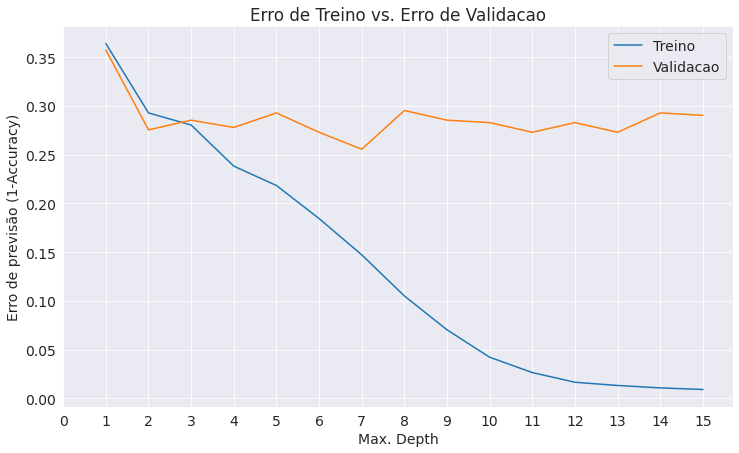

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Erro de treinamento'])
plt.plot(errors_df['Max Depth'], errors_df['Erro de validacao'])
plt.title('Erro de Treino vs. Erro de Validacao')
plt.xticks(range(0,16))
plt.xlabel('Max. Depth')
plt.ylabel('Erro de previsão (1-Accuracy)')
plt.legend(['Treino','Validacao'])
plt.show()

Com base no erro de treinamento e validação, escolheremos max_depth igual a 9, pois o erro de previsão no teste de validação é o menor.

In [ ]:
model=DecisionTreeClassifier(max_depth=9, random_state=2).fit(X_train,train_target)
model.score(X_train,train_target)

0.9296939619520265

In [ ]:
model.score(X_val,val_target)

0.7146401985111662

Desta vez, nossa pontuação de precisão é de 71% para o teste de validação. Ainda podemos ajustar outros parâmetros para melhorar o modelo, mas vamos tentar outro modelo chamado Random Forest .

### Random Forest 


Random Forest é um modelo de aprendizado supervisionado que utiliza ensemble learningvárias árvores de decisão cuja saída é baseada na média das saídas dessas árvores. Ensemble learningé uma técnica que combina muitos classificadores para fornecer uma solução.

O ensemble é uma técnica que combina muitos classificadores para fornecer uma solução.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=2).fit(X_train,train_target)

In [ ]:
model.score(X_train,train_target)

1.0

In [ ]:
model.score(X_val,val_target)

0.8089330024813896

Assim como a árvore de decisão, nosso modelo de floresta aleatória superajusta os dados no conjunto de trens, mas obtivemos uma melhoria de 80% de precisão.
Veremos a importância dos recursos.

In [ ]:
importance_df= pd.DataFrame({
    'feature': X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
4,instrumentalness,0.118175
7,loudness,0.113709
3,energy,0.091533
9,speechiness,0.091305
1,danceability,0.079764
2,duration_ms,0.079070
0,acousticness,0.078475
12,valence,0.070947
10,tempo,0.061130
14,artist,0.060381


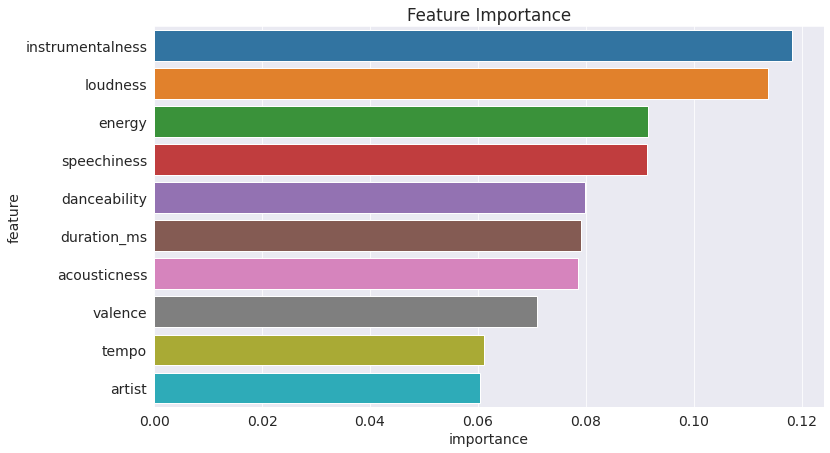

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature');

Desta vez, Instrumentalidade e Loudness parecem ser as características mais importantes seguidas por Speechiness e Danceability.

### N_ESTIMATOR

Vamos ajustar o número de estimadores.

N_estimators é um hiperparâmetro que decide o número de árvores a serem usadas no modelo.

In [ ]:
def n_estimator_error(n):
    model = RandomForestClassifier(n_jobs=-1,n_estimators=n, random_state=2)
    model.fit(X_train, train_target)
    train_acc = 1 - model.score(X_train, train_target)
    val_acc= 1 - model.score(X_val, val_target)
    
    return {'N_Estimator': n, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
n_errors=pd.DataFrame([n_estimator_error(n) for n in range(100,500)])

In [ ]:
n_errors.sort_values('Validation Error',ascending=True)

,N_Estimator,Training Error,Validation Error
334,434,0.0,0.181141
356,456,0.0,0.183623
328,428,0.0,0.183623
329,429,0.0,0.183623
330,430,0.0,0.183623
...,...,...,...
158,258,0.0,0.198511
144,244,0.0,0.198511
150,250,0.0,0.200993
146,246,0.0,0.200993


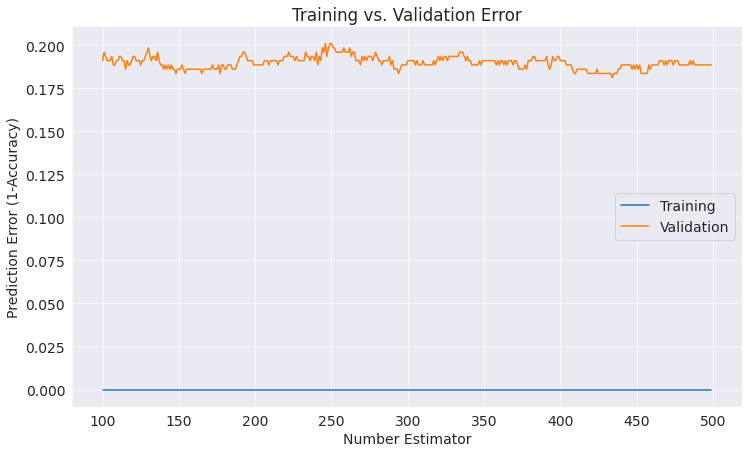

In [ ]:
plt.figure()
plt.plot(n_errors['N_Estimator'], n_errors['Training Error'])
plt.plot(n_errors['N_Estimator'], n_errors['Validation Error'])
plt.title('Training vs. Validation Error')
# plt.xticks(range(2,128,8))
plt.xlabel('Number Estimator')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

In [ ]:
model= RandomForestClassifier(n_jobs=-1,n_estimators=112,random_state=2).fit(X_train,train_target)
train_acc=model.score(X_train,train_target)
val_acc=model.score(X_val,val_target)
print('Train_accuracy:{:.2f}\nVal_accuracy:{:.2f}'.format(train_acc*100,val_acc*100))

Train_accuracy:100.00
Val_accuracy:80.65


Em cerca de 112 estimadores, temos um erro de validação razoável.

### Features

Max_feature é um hiperparâmetro que controla o limite de recursos que cada árvore usa em cada divisão.

In [ ]:
def max_features(n):
    model = RandomForestClassifier(n_jobs=-1,max_features=n, random_state=2)
    model.fit(X_train, train_target)
    train_acc = 1 - model.score(X_train, train_target)
    val_acc= 1 - model.score(X_val, val_target)
    
    return {'Max Feature': n, 'Erro de Treino': train_acc, 'Erro de Validacao': val_acc}

In [ ]:
feature_error=pd.DataFrame(max_features(n) for n in range(1,12))

In [ ]:
feature_error.sort_values('Erro de Validacao',ascending=True)

,Max Feature,Erro de Treino,Erro de Validacao
2,3,0.0,0.191067
3,4,0.0,0.191067
4,5,0.0,0.193548
5,6,0.0,0.193548
7,8,0.0,0.193548
8,9,0.0,0.198511
9,10,0.0,0.198511
1,2,0.0,0.208437
6,7,0.0,0.213400
10,11,0.0,0.215881


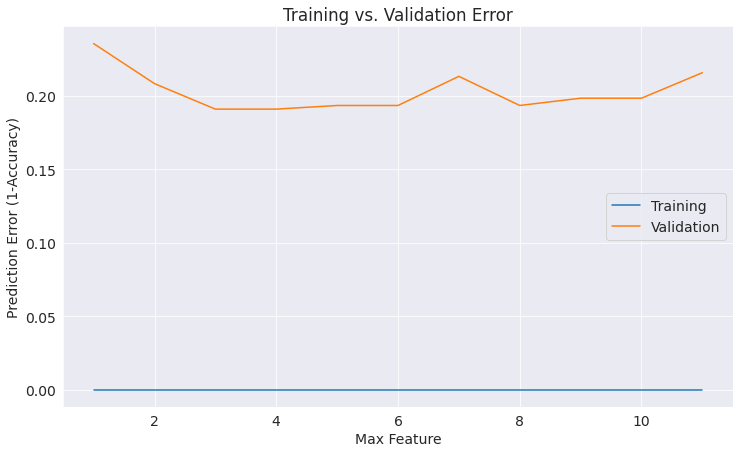

In [ ]:
plt.figure()
plt.plot(feature_error['Max Feature'], feature_error['Erro de Treino'])
plt.plot(feature_error['Max Feature'], feature_error['Erro de Validacao'])
plt.title('Training vs. Validation Error')
plt.xlabel('Max Feature')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

Em cerca de 3 feature temos um bom erro de validação.

In [ ]:
model= RandomForestClassifier(n_jobs=-1,max_features=3,random_state=2).fit(X_train,train_target)
train_acc=model.score(X_train,train_target)
val_acc=model.score(X_val,val_target)
preds=model.predict(X_val)
print('Train_accuracy:{:.2f}\nVal_accuracy:{:.2f}'.format(train_acc*100,val_acc*100))

Train_accuracy:100.00
Val_accuracy:80.89


### Max_Depth


In [ ]:
def max_depth_error(n):
    model=RandomForestClassifier(n_jobs=-1,max_depth=n,random_state=2).fit(X_train,train_target)
    train_acc=1 - model.score(X_train,train_target)
    val_acc=1 - model.score(X_val,val_target)
    return {'Max Depth': n,'Training Error': train_acc,'Validation Error': val_acc}

In [ ]:
md_error=pd.DataFrame([max_depth_error(n) for n in range(1,25)])

In [ ]:
md_error.sort_values('Validation Error', ascending=True)

,Max Depth,Training Error,Validation Error
7,8,0.052936,0.183623
15,16,0.000000,0.186104
11,12,0.000827,0.188586
21,22,0.000000,0.191067
17,18,0.000000,0.191067
14,15,0.000000,0.191067
22,23,0.000000,0.191067
23,24,0.000000,0.191067
5,6,0.121588,0.191067
13,14,0.000000,0.193548


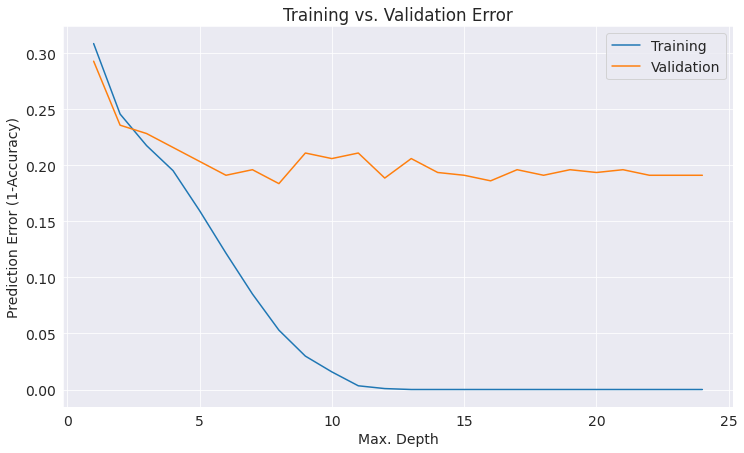

In [ ]:
plt.figure()
plt.plot(md_error['Max Depth'], md_error['Training Error'])
plt.plot(md_error['Max Depth'], md_error['Validation Error'])
plt.title('Training vs. Validation Error')
# plt.xticks(range(2,128,8))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1-Accuracy)')
plt.legend(['Training','Validation'])
plt.show()

A cerca de 16 de profundidade máxima, nosso modelo produz o menor erro.
Vamos colocar todas essas descobertas no modelo.


In [ ]:
model=RandomForestClassifier(n_jobs=-1,n_estimators=112,max_features=3,max_depth=16,random_state=2).fit(X_train,train_target)
model.score(X_val,val_target)

0.8014888337468983

In [ ]:
model.score(X_test,test_target)

0.7741935483870968

A precisão do modelo é de 80% no teste de validação e 77% no conjunto de teste. 

Pode inferir que nosso modelo generaliza um pouco bem em dados que não viu antes. 

Vamos empurrar nossa avaliação criando um modelo dumb.


Vamos criar três modelos: um que adivinha aleatoriamente, outro que sempre salva a música retornando '1' e um final que sempre descarta uma música retornando '0'

In [ ]:
# Criando um modelo que adivinhe aleatoriamente
def random_guess(inputs):
    return np.random.choice([0,1], len(inputs))
#Criando um modelo que sempre salve a música
def all_save(inputs):
    return np.full(len(inputs), 1)
#Criando um modelo que descarte todas as músicas
def all_discard(inputs):
    return np.full(len(inputs), 0)

In [ ]:
guess=accuracy_score(test_target,random_guess(X_test))
save=accuracy_score(test_target, all_save(X_test))
discard=accuracy_score(test_target,all_discard(X_test))
print('Precisão Aleatória: {:.2f}%\nPrecisão Todos Salvar: {:.2f}%\nPrecisão Descartar Todos : {:.2f}%'.format(guess*100,save*100,discard*100))

Precisão Aleatória: 49.63%
Precisão Todos Salvar: 47.64%
Precisão Descartar Todos : 52.36%


Todos os modelos dumb têm um desempenho ruim em comparação com o nosso Random Forestmodelo.

Sua precisão é de cerca de 50%.

## Conclusão

* A EDA é um passo crucial para formular um modelo que possa generalizar bem.

* A distribuição e o intervalo de um conjunto de dados podem ser transformados usando uma técnica como normalização e IQR para melhorar nosso modelo.

* A regressão logística depende da correlação e linearidade entre as entradas e saídas para um bom desempenho.

* Treinar, validar e testar é uma técnica útil para avaliar o modelo, mas pode ser extenuante de implementar.

* O Random Forest é um modelo poderoso que pode elevar a previsão do modelo; no entanto, pode ser um processo extenuante para ajustá-lo.

* Ajustar o parâmetro pode melhorar um modelo.

* O treinamento de um modelo de aprendizado de máquina é um processo iterativo longo.

* Um problema de classificação, como prever se a música será salva em uma lista de reprodução de ouvintes, pode ser resolvido usando um algoritmo de aprendizado de máquina.



---


## Referências

* https://pandas.pydata.org/
* https://seaborn.pydata.org/
* https://medium.com
* https://www.kaggle.com
* https://towardsdatascience.com/
* https://medium.com/analytics-vidhya
* https://www.coursera.org/learn/machine-learning
* https://jovian.ai/
* https://github.com/jeri96/
* https://www.kaggle.com/geomack/spotifyclassification




# Contatos


[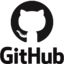](https://github.com/willclopes)


---


[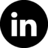 ](https://www.linkedin.com/in/willclopes/)





---

[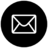](willclopes@gmail.com)

 



